In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dotenv import load_dotenv
import os,sys
load_dotenv()




True

In [33]:
# os.getcwd()

In [34]:
rpath = os.path.abspath("../../w8_causal_inference/")
if rpath not in sys.path:
    sys.path.insert(0, rpath)


In [35]:
from src.utilis import plot_column_vs_column
from src.utilis import rm_outliers_using_IQR
from src.utilis import calculate_speed 
from src.utilis import plot_histogram 


In [31]:
nb_new= pd.read_csv("../data/nb_new.csv")

In [36]:
nb_new.head()
# nb_new.drop("Unnamed: 0", axis= 1, inplace=True)


,Unnamed: 0,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,duration_in_minutes,distance_km
0,0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,2.0,16.123451
1,1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,29.0,1.884305
2,2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,41.0,13.822393
3,3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,14.0,1.511034
4,4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,4.0,20.984319


In [37]:
nb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           536020 non-null  int64  
 1   Trip ID              536020 non-null  int64  
 2   Trip Origin          536020 non-null  object 
 3   Trip Destination     536020 non-null  object 
 4   Trip Start Time      534369 non-null  object 
 5   Trip End Time        536019 non-null  object 
 6   duration_in_minutes  534368 non-null  float64
 7   distance_km          536020 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 32.7+ MB


In [38]:
nb_new.describe()

,Unnamed: 0,Trip ID,duration_in_minutes,distance_km
count,536020.000000,5.360200e+05,534368.000000,536020.000000
mean,268009.500000,9.910221e+05,81.605278,12.073743
std,154735.789983,3.456364e+05,797.344109,11.021064
min,0.000000,3.919960e+05,0.000000,0.000000
25%,134004.750000,6.935610e+05,34.000000,5.528929
50%,268009.500000,9.910085e+05,53.000000,10.482448
75%,402014.250000,1.281570e+06,80.000000,16.970305
max,536019.000000,1.637709e+06,296895.000000,680.080847


# discovering and removing outliers 

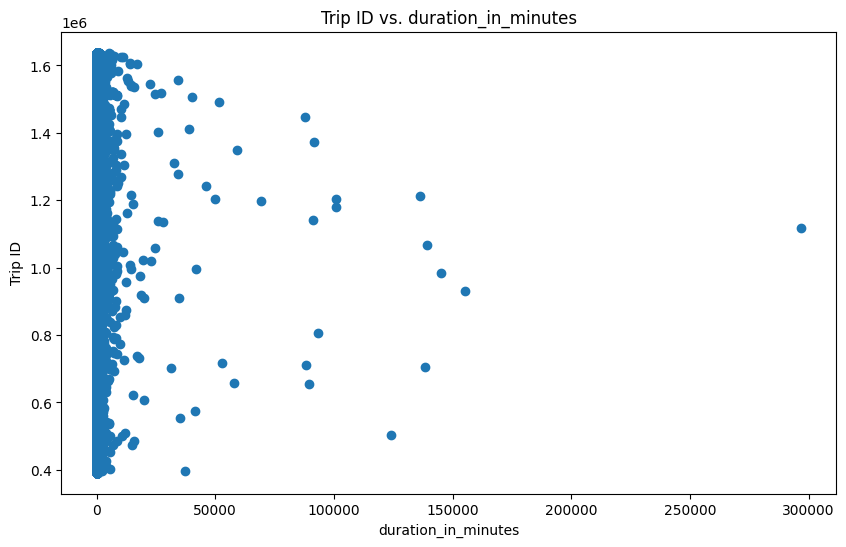

In [39]:
plot_column_vs_column(nb_new, "duration_in_minutes", "Trip ID",)

In [40]:
# remove outliers form "duration_in_minutes" coulmn using IQR 
nb_new = rm_outliers_using_IQR("duration_in_minutes",nb_new)


In [41]:
nb_new.describe()

,Unnamed: 0,Trip ID,duration_in_minutes,distance_km
count,505159.000000,5.051590e+05,505159.000000,505159.000000
mean,265623.023207,9.856699e+05,55.574304,11.729558
std,154388.041066,3.447508e+05,31.576745,10.783862
min,0.000000,3.919960e+05,0.000000,0.000000
25%,131595.500000,6.890425e+05,33.000000,5.410975
50%,264696.000000,9.838810e+05,51.000000,10.215730
75%,398907.000000,1.274290e+06,74.000000,16.488059
max,536019.000000,1.637709e+06,149.000000,680.080847


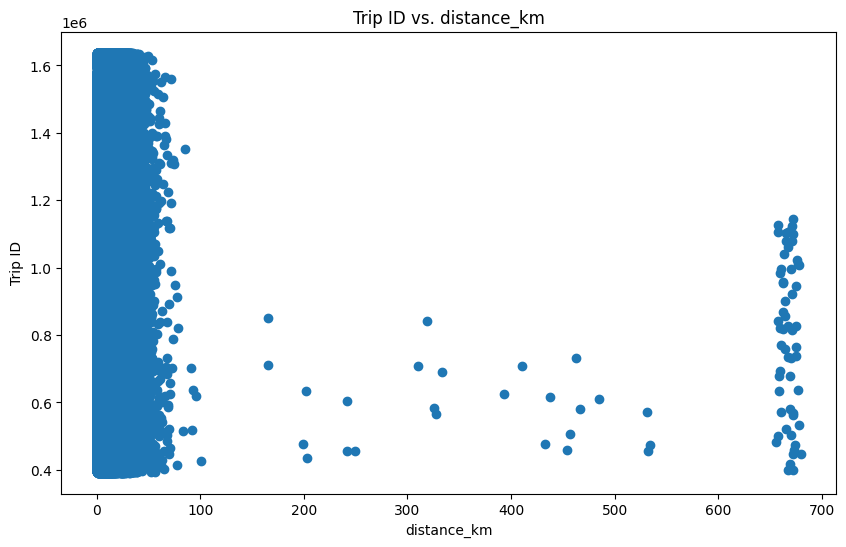

In [42]:
plot_column_vs_column(nb_new, "distance_km", "Trip ID",)

In [43]:
# remove outliers form "distance_km" coulmn using IQR 
nb_new = rm_outliers_using_IQR("distance_km",nb_new)

In [44]:
nb_new.describe()

,Unnamed: 0,Trip ID,duration_in_minutes,distance_km
count,500242.000000,5.002420e+05,500242.000000,500242.000000
mean,265702.210866,9.858371e+05,55.257401,11.378298
std,154366.786342,3.446964e+05,31.264864,7.316158
min,0.000000,3.919960e+05,0.000000,0.000000
25%,131700.250000,6.892202e+05,33.000000,5.369822
50%,264907.500000,9.843375e+05,51.000000,10.115327
75%,398907.500000,1.274292e+06,74.000000,16.252995
max,536019.000000,1.637709e+06,149.000000,33.103327


In [45]:
# plot_column_vs_column(nb_new, "distance_km", "duration_in_minutes",)

In [47]:
calculate_speed(nb_new,'distance_km', 'duration_in_minutes' )
nb_new

,Unnamed: 0,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,duration_in_minutes,distance_km,speed_km/h
0,0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,2.0,16.123451,483.703532
1,1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,29.0,1.884305,3.898562
2,2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,41.0,13.822393,20.227892
3,3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,14.0,1.511034,6.475861
4,4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,4.0,20.984319,314.764786
...,...,...,...,...,...,...,...,...,...
536015,536015,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59,28.0,1.254752,2.688755
536016,536016,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49,56.0,9.124781,9.776552
536017,536017,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32,50.0,2.733704,3.280445
536018,536018,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28,20.0,6.504796,19.514388


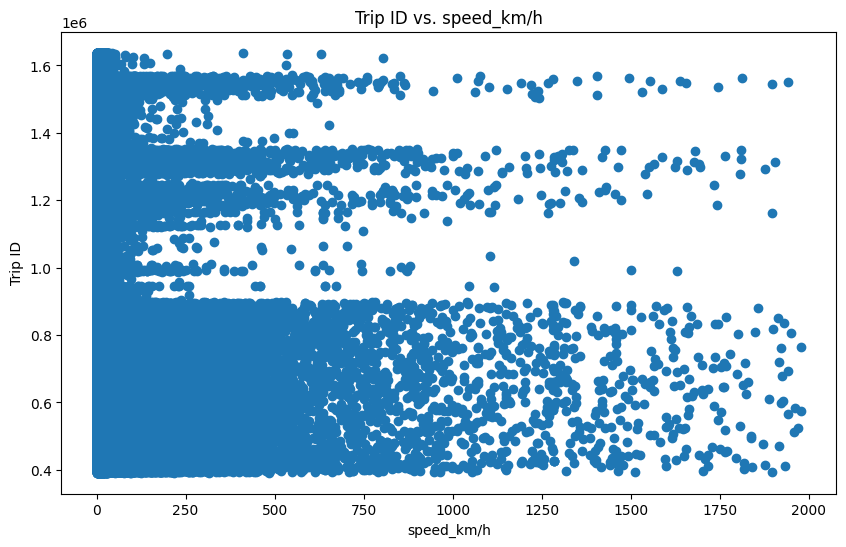

In [48]:
plot_column_vs_column(nb_new, "speed_km/h", "Trip ID",)

In [49]:
nb_new["speed_km/h"].describe()

count    500242.000000
mean         22.488639
std          71.710592
min           0.000000
25%           7.243425
50%          11.467335
75%          17.015408
max        1979.194755
Name: speed_km/h, dtype: float64

In [50]:
nb_new = rm_outliers_using_IQR("speed_km/h",nb_new)

In [51]:
nb_new["speed_km/h"].describe()

count    463805.000000
mean         11.655181
std           6.210025
min           0.000000
25%           6.935257
50%          10.819704
75%          15.504588
max          31.672808
Name: speed_km/h, dtype: float64

In [52]:
# Count the occurrences of the value 0
count_of_0 = nb_new['speed_km/h'].value_counts()#.get(0, -1)
print(count_of_0)


speed_km/h
0.000000     973
14.802221     26
7.648855      21
1.930321      16
9.244689      15
            ... 
7.050082       1
18.016097      1
12.633274      1
16.535594      1
15.274571      1
Name: count, Length: 459624, dtype: int64


In [53]:
# removing the rows that contain speed 0 since it is means no movement from the driver 
# or it zero because in the speed calculation we assiend zero to speed column when the duration is zero 
# in all cases we need to remove them.
  
nb_new = nb_new.drop(nb_new[nb_new['speed_km/h'] == 0].index)

In [54]:
# Count the occurrences of the value 0
count_of_0 = nb_new['speed_km/h'].value_counts()#.get(0, -1)
print(count_of_0)

speed_km/h
14.802221    26
7.648855     21
1.930321     16
16.446912    15
9.244689     15
             ..
7.050082      1
18.016097     1
12.633274     1
16.535594     1
15.274571     1
Name: count, Length: 459623, dtype: int64


In [60]:
# nb_new.drop("Unnamed: 0", axis=1, inplace=True)
# nb_new.to_csv("../data/nb.last.csv")

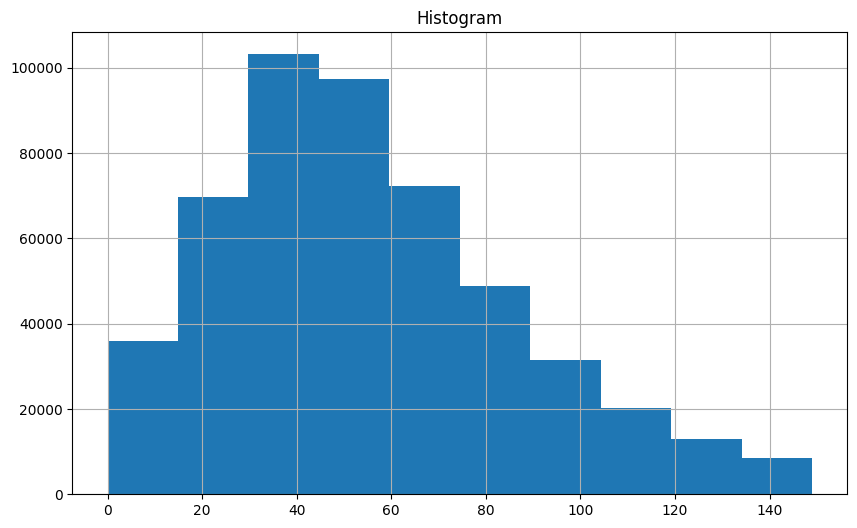

In [18]:
# Plot a histogram
plt.figure(figsize=(10, 6))
# nb_new['distance_km'].hist()
nb_new['duration_in_minutes'].hist()
plt.title('Histogram')
plt.show()
